# Модули:

In [1]:
import numpy
import pandas
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Описание задачи
Набор данных содержит около 10 лет с 2008 до 2018 ежедневных метеорологических наблюдений из разных мест по всей Австралии. Нужно предсказать, будет ли дождь завтра или нет. Правильные значения находятся в признаке RainTomorrow.

# Загрузка данных

In [2]:
url = "https://raw.githubusercontent.com/Vladislavbul/Machine_learning/main/weatherAUS.csv"
data = pandas.read_csv(url)
data['RainToday'] = data['RainToday'].apply(
    lambda v: None if type(v) == float else v == "Yes")
data['RainTomorrow'] = data['RainTomorrow'].apply(
    lambda v: None if type(v) == float else v == "Yes")
data['Date'] = pandas.to_datetime(data['Date'])
data['Date'].dtype

data.shape

(145460, 23)

In [3]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,False,False
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,False,False
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,False,False
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,False,False
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,False,False


In [4]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

Мы видим, что столбцы (признаки) имеют имена:
* Date - Дата наблюдения
* Location - Название места расположения метеостанции
* MinTemp - Минимальная температура
* MaxTemp - Максимальная температура
* Rainfall - Количество осадков, за сутки в мм
* Evaporation - Испарения за сутки
* Sunshine - Количество солнечных часов за сутки
* WindGustDir - Направление самого сильного порыва ветра за сутки
* WindGustSpeed - Скорость (км/ч) самого сильного порыва ветра за сутки
* WindDir9am - Направление ветра в 9 утра дня
* WindDir3pm - Направление ветра в 3 часа дня
* WindSpeed9am - Средняя скорость ветра (км/ч) в 9 утра дня
* WindSpeed3pm - Средняя скорость ветра (км/ч) в 3 часа дня
* Humidity9am - Влажность воздуха (в процентах) в 9 утра дня
* Humidity3pm - Влажность (в процентах) в 3 часа дня
* Pressure9am - Среднее значение атмосферного давления (гПа) над уровнем моря в 9 утра дня
* Pressure3pm - Среднее значение атмосферного давления (гПа) над уровнем моря в 3 часа дня
* Cloud9am - Часть неба, скрытая облаками, в 9 утра. Этот показатель измеряется в октантах. Данный признак означает, сколько октантов (небо разделяется на 8 частей) неба скрыто облаками. Показатель 0 указывает на полностью чистое небо, в то время как показатель 8 указывает на то, что оно полностью затянуто облаками.
* Cloud3pm - Часть неба, скрытая облаками (измеряется в октантах), в 3 часа дня
* Temp9am - Температура (градусы Цельсия) в 9 утра дня
* Temp3pm - Температура (градусы Цельсия) в 3 часа дня
* RainToday - Логическое значение: 1, если Осадки (мм) в течение 24 часов до 9 утра превышают 1 мм, в противном случае 0
* RainTomorrow - Целевая переменная. Будет ли завтра дождь?

In [6]:
data['Location'] = data['Location'].astype('category')
data['Location'].dtype

CategoricalDtype(categories=['Adelaide', 'Albany', 'Albury', 'AliceSprings',
                  'BadgerysCreek', 'Ballarat', 'Bendigo', 'Brisbane', 'Cairns',
                  'Canberra', 'Cobar', 'CoffsHarbour', 'Dartmoor', 'Darwin',
                  'GoldCoast', 'Hobart', 'Katherine', 'Launceston',
                  'Melbourne', 'MelbourneAirport', 'Mildura', 'Moree',
                  'MountGambier', 'MountGinini', 'Newcastle', 'Nhil',
                  'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
                  'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond',
                  'Sale', 'SalmonGums', 'Sydney', 'SydneyAirport',
                  'Townsville', 'Tuggeranong', 'Uluru', 'WaggaWagga',
                  'Walpole', 'Watsonia', 'Williamtown', 'Witchcliffe',
                  'Wollongong', 'Woomera'],
, ordered=False)

In [7]:
data['WindDir3pm'] = data['WindDir3pm'].astype('category')
data['WindDir3pm'].dtype

CategoricalDtype(categories=['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE',
                  'SSE', 'SSW', 'SW', 'W', 'WNW', 'WSW'],
, ordered=False)

In [8]:
data['WindDir9am'] = data['WindDir9am'].astype('category')
data['WindDir9am'].dtype

CategoricalDtype(categories=['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE',
                  'SSE', 'SSW', 'SW', 'W', 'WNW', 'WSW'],
, ordered=False)

In [9]:
data['WindGustDir'] = data['WindGustDir'].astype('category')
data['WindGustDir'].dtype

CategoricalDtype(categories=['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE',
                  'SSE', 'SSW', 'SW', 'W', 'WNW', 'WSW'],
, ordered=False)

In [10]:
rows_to_drop = data[
    (data['Cloud9am'] == data['Cloud9am'].quantile(1)) | (data['Cloud3pm'] == data['Cloud3pm'].quantile(1)) | (data['Rainfall'] > data['Rainfall'].quantile(0.999)) | (data['Evaporation'] > data['Evaporation'].quantile(0.999)) | (data['WindGustSpeed'] > data['WindGustSpeed'].quantile(0.999))].index
data = data.drop(rows_to_drop)
data.shape

(145114, 23)

In [11]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143632.000000,143855.000000,141856.000000,82488.000000,75445.000000,134861.000000,143353.000000,142058.000000,142469.000000,140620.000000,130069.000000,130107.000000,89317.000000,85851.000000,143351.000000,141513.000000
mean,12.183848,23.215642,2.217314,5.416176,7.618526,39.956348,14.018444,18.640816,68.881097,51.523332,1017.669993,1015.275066,4.445156,4.506762,16.982574,21.678980
std,6.395376,7.115475,7.068215,3.846834,3.781495,13.440696,8.882455,8.777681,19.013097,20.769858,7.094443,7.026386,2.886198,2.719709,6.486823,6.933057
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,978.200000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.000000,1010.500000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.300000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,48.100000,102.000000,42.400000,14.500000,100.000000,130.000000,83.000000,100.000000,100.000000,1041.000000,1039.600000,8.000000,8.000000,40.200000,46.700000


In [12]:
columns = ["MinTemp", "MaxTemp", "Rainfall", "Evaporation", "Sunshine", "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm", "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm", "Cloud9am", "Cloud3pm", "Temp9am", "Temp3pm"]
data.fillna(data[columns].median(axis=0), axis=0, inplace=True)
data.isna().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir      10316
WindGustSpeed        0
WindDir9am       10555
WindDir3pm        4221
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         3258
RainTomorrow      3262
dtype: int64

In [13]:
data['WindGustDir'].fillna(data['WindGustDir'].mode().iloc[0], inplace=True)
data['WindDir9am'].fillna(data['WindDir9am'].mode().iloc[0], inplace=True)
data['WindDir3pm'].fillna(data['WindDir3pm'].mode().iloc[0], inplace=True)
data.isna().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday        3258
RainTomorrow     3262
dtype: int64

In [14]:
data.dropna(axis=0, how='all', subset=['RainTomorrow'], inplace=True)
data.dropna(axis=0, how='all', subset=['RainToday'], inplace=True)
data.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [15]:
data['RainTomorrow'] = data['RainTomorrow'].astype('float32')
data['RainToday'] = data['RainToday'].astype('float32')
data = pandas.get_dummies(data)
data.shape

(140448, 116)

In [16]:
data_stand = data.drop(['Date'], axis=1)
numpy.random.seed(52)
random_subset = numpy.random.choice(
    numpy.arange(data_stand.shape[0]), size=40000, replace=False)
data_stand = data_stand.iloc[random_subset]
data_stand = (data_stand - data_stand.min(axis=0)) / \
    (data_stand.max(axis=0) - data_stand.min(axis=0))
data_stand['RainTomorrow'].astype('bool')
data_stand['RainToday'].astype('bool')
pass

# Разбить данные на обучающую и тестовую выборки

In [17]:
X = data_stand.drop(['RainTomorrow'], axis=1)
y = data_stand['RainTomorrow']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=52)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

# Создание модели и ее обучение

In [19]:
mlp_model = MLPClassifier(hidden_layer_sizes=(50,),
                          solver='adam',
                          activation='relu',
                          random_state=3,
                          max_iter=1000)

In [20]:
%%time
mlp_model.fit(X_train, y_train)

Wall time: 1min 34s


MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=3)

### Проверка качества классификатора:

In [21]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

### Проверка точности на обучающей и тестовой выборке:

In [22]:
print("TRAIN: {:.2f}% TEST: {:.2f}%".format(accuracy_score(y_train, y_train_pred)
      * 100, accuracy_score(y_test, y_test_pred) * 100))

TRAIN: 92.90% TEST: 82.26%


Из-за того, что точность на тренировочной выборке сильно больше, чем на тестовой, то наблюдается переобучение.

# Подбор параметра регуляризации

In [23]:
alpha_arr = numpy.logspace(-3, 2, 15)

test_err, train_err = [], []
train_acc, test_acc = [], []

for alpha in alpha_arr:
    model = MLPClassifier(alpha=alpha, hidden_layer_sizes=(50,),
                          solver='adam', activation='relu', max_iter=1000, random_state=9)
   
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_err.append(numpy.mean(y_train != y_train_pred))
    test_err.append(numpy.mean(y_test != y_test_pred))
    
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

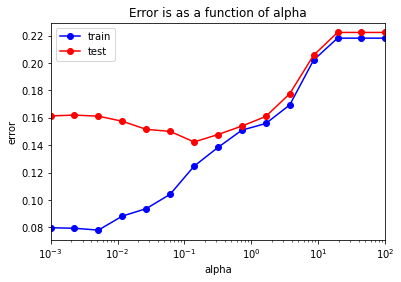

In [24]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([numpy.min(alpha_arr), numpy.max(alpha_arr)])
plt.title('Error is as a function of alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

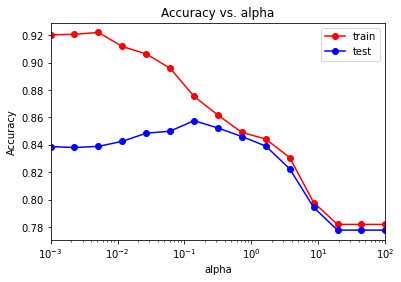

In [25]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label='train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label='test')
plt.xlim([numpy.min(alpha_arr), numpy.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

Оптимальное значение alpha:

In [26]:
min_train_err = numpy.min(train_err)
min_test_err = numpy.min(test_err)
alpha_opt = alpha_arr[test_err == min_test_err]
print("Alpha opt:", alpha_opt)

Alpha opt: [0.13894955]


### Классификатор при найденном оптимальном значении alpha:

In [27]:
mlp_model = MLPClassifier(alpha=alpha_opt, hidden_layer_sizes=(50,),
                          solver='adam', activation='relu', random_state=7)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

### Проверка точности на обучающей и тестовой выборке:

In [28]:
print("TRAIN: {:.2f}% TEST: {:.2f}%".format(accuracy_score(y_train, y_train_pred)
      * 100, accuracy_score(y_test, y_test_pred) * 100))

TRAIN: 87.82% TEST: 85.51%


### Матрица рассогласования:

In [29]:
print(confusion_matrix(y_test_pred, y_test))

[[7312  984]
 [ 465 1239]]


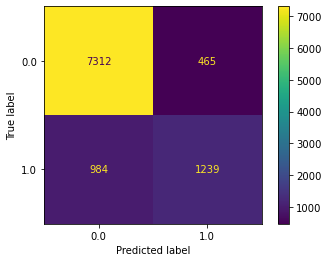

In [30]:
predictions = mlp_model.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=mlp_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp_model.classes_)
disp.plot()
plt.show()

# Подбор числа нейронов:

In [31]:
neuron_count_array = numpy.linspace(10, 300, 30).astype(int)
test_error = []
train_error = []
test_acc = []
train_acc = []

for neuron_count in neuron_count_array:
    model = MLPClassifier(
        alpha=alpha_opt,
        hidden_layer_sizes=(neuron_count,),
        solver='adam',
        activation='relu',
        max_iter=1000,
        random_state=7
    )
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    test_error.append(numpy.mean(y_test != y_test_pred))
    train_error.append(numpy.mean(y_train != y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))

Train: минимальное значение ошибки = 0.07806666666666667, число нейронов = 0.005179474679231213
Test: минимальное значение ошибки = 0.1424, число нейронов = 0.13894954943731375


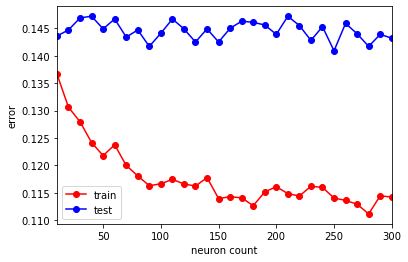

In [32]:
plt.plot(neuron_count_array, train_error, 'r-o', label='train')
plt.plot(neuron_count_array, test_error, 'b-o', label='test')
plt.xlim([numpy.min(neuron_count_array), numpy.max(neuron_count_array)])
plt.xlabel('neuron count')
plt.ylabel('error')
plt.legend()

print(f"Train: минимальное значение ошибки = {numpy.min(train_err)}, число нейронов = {alpha_arr[numpy.argmin(train_err)]}")
print(f"Test: минимальное значение ошибки = {numpy.min(test_err)}, число нейронов = {alpha_arr[numpy.argmin(test_err)]}")

Train: минимальное значение ошибки = 0.8633333333333333, число нейронов = 0.001
Test: минимальное значение ошибки = 0.8528, число нейронов = 0.011787686347935873


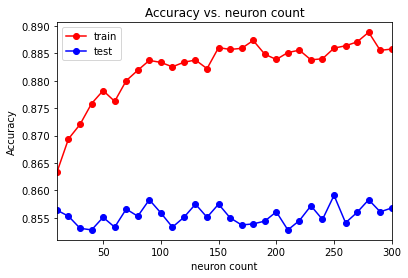

In [33]:
plt.plot(neuron_count_array, train_acc, 'r-o', label='train')
plt.plot(neuron_count_array, test_acc, 'b-o', label='test')
plt.xlim([numpy.min(neuron_count_array), numpy.max(neuron_count_array)])
plt.title('Accuracy vs. neuron count')
plt.xlabel('neuron count')
plt.ylabel('Accuracy')
plt.legend()

print(f"Train: минимальное значение ошибки = {numpy.min(train_acc)}, число нейронов = {alpha_arr[numpy.argmin(train_acc)]}")
print(f"Test: минимальное значение ошибки = {numpy.min(test_acc)}, число нейронов = {alpha_arr[numpy.argmin(test_acc)]}")

In [34]:
min_test_error = numpy.min(test_error)
neuron_opt = neuron_count_array[test_error == min_test_error][0]
print('Оптимальное число нейронов: {}'.format(neuron_opt))

Оптимальное число нейронов: 250


### Классификатор при найденном оптимальном значении числа нейронов:

In [35]:
mlp_model = MLPClassifier(alpha=alpha_opt, hidden_layer_sizes=(neuron_opt,),
                          solver='adam', activation='relu', max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

### Проверка точности на обучающей и тестовой выборке:

In [36]:
print("TRAIN: {:.2f}% TEST: {:.2f}%".format(accuracy_score(y_train, y_train_pred)
      * 100, accuracy_score(y_test, y_test_pred) * 100))

TRAIN: 88.59% TEST: 85.92%


# Подбор оптимального значения параметра регуляризации и числа нейронов

In [37]:
neuron_arr = numpy.linspace(10, 300, 5).astype(int)
alpha_arr = numpy.logspace(-3, 2, 5)
test_err = []
train_err = []
train_acc = []
test_acc = []
neuron_alpha_opt = []

for neuron in neuron_arr:
    for alpha in alpha_arr:
        mlp_model = MLPClassifier(alpha=alpha, hidden_layer_sizes=(neuron,),
                                  solver='adam', activation='relu', max_iter=1500, random_state=3)
        mlp_model.fit(X_train, y_train)

        y_train_pred = mlp_model.predict(X_train)
        y_test_pred = mlp_model.predict(X_test)

        train_err.append(numpy.mean(y_train != y_train_pred))
        test_err.append(numpy.mean(y_test != y_test_pred))
        train_acc.append(accuracy_score(y_train, y_train_pred))
        test_acc.append(accuracy_score(y_test, y_test_pred))
        neuron_alpha_opt.append([neuron, alpha])

In [38]:
min_test_err = numpy.min(test_err)
i, = numpy.where(test_err == min_test_err)
neuron_opt, alpha_opt = neuron_alpha_opt[i[0]]
print("Neuron count opt:", neuron_opt)
print("Alpha opt: ", alpha_opt)

Neuron count opt: 155
Alpha opt:  0.31622776601683794


### Классификатор при найденных оптимальных значениях:

In [39]:
mlp_model = MLPClassifier(alpha=alpha_opt, hidden_layer_sizes=(neuron_opt,),
                          solver='adam', activation='relu', max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

### Проверка точности на обучающей и тестовой выборке:¶

In [40]:
print("TRAIN: {:.2f}% TEST: {:.2f}%".format(accuracy_score(y_train, y_train_pred)
      * 100, accuracy_score(y_test, y_test_pred) * 100))

TRAIN: 86.51% TEST: 85.40%


# Выводы:

### Подбор оптимального параметра регуляризации:
    Можно избавиться от переобучения, тем самым повысить точность на тестовой выборке;
### Подбор оптимального числа нейронов:
    При оптимальном значении регулярации, немного повысил точность на тестовой выборке;
### Подбор с помощью обоих параметров:
    Мы избавляемся от переобучения и повышаем точность на обучающей выборке, при этом не теряя точность на тестовой.